### Podstawy obsługi błędów

Programowanie w nierozerwalny sposób łączy się z błędami. Do tej pory, kiedy coś wykonało się niepoprawnie, program kończył swoje działanie i wyświetlał stosowny komunikat. Jeśli jednak zależy nam na tym, żeby program działał stabilnie i nie wyłączał się w nieprzewidywalnych momentach, możemy zaprojektować kod tak, żeby podejmowane było konkretne działanie kiedy błąd rzeczywiście się pojawi. Każdy błąd ma swoją nazwę, przyjrzyjmy się więc różnym rodzajom najczęściej spotykanych błędów i na końcu przejdźmy do ich obsługi.

**SyntaxError**

Podstawowym rodzajem błędu jest błąd skałdniowy `SyntaxError`, występujący kiedy źle napisaliśmy kod. np. zapomnieliśmy o wcięciu, lub nawiasie:

In [1]:
def f(x:
    return x

SyntaxError: invalid syntax (<ipython-input-1-b2d9d311f303>, line 2)

Widzimy, że ostatnia linijka informuje nas właśnie o tym, że składnia jest zła. Zauważmy, że linijka do której się błąd odnosi to ta z komendą `return x`, mimo że błąd polega na braku nawiasu przy definicji funkcji. Wynika to z tego, że to podczas wykonywania następnej linijki kodu program wykrył problem. Warto więc pamiętać podczas programowania, żeby sprawdzić także linijkę wcześniej, jeśli ten błąd się pojawi. Tego błędu nie da się obejść inaczej niż poprawiając kod programu.

Poza błędami składniowymi wszystkie inne rodzaje jesteśmy w stanie wyłapać podczas działania kodu. 

**Przykłady innych błędów**

Błąd dzielenia przez zero `ZeroDivisionError`:

In [6]:
2 / 0 

ZeroDivisionError: division by zero

Błąd związany z wartością `ValueError`. Przykładowo, chcemy żeby użytkownik podał numer, a dostaliśmy coś innego:

In [4]:
number = int(input('Podaj numer: '))

Podaj numer: ala


ValueError: invalid literal for int() with base 10: 'ala'

Błąd związany z brakiem zadeklarowanej zmiennej o danej nazwie `NameError`:

In [5]:
print(text)

NameError: name 'text' is not defined

I wiele, wiele innych. Podstawową metodą obsługi wszystkich błędów jest konstrukcja `try:... except:...`. Wykorzystajmy tę konstrukcję na prostym przykładzie. Mamy listę kilku liczb będących mianownikami ułamka o liczniku 10. Chcemy wyświetlić wynik takiego dzielenia, niestety jedną z liczb jest 0, co spowoduje wywołanie `ZeroDivisionError`

In [3]:
mianownik = [1, 2, 3, 4, 0, 5, 6, 7]
for m in mianownik:
    print(10 / m)

10.0
5.0
3.3333333333333335
2.5


ZeroDivisionError: division by zero

A teraz wersja z konstrukcją `try:... except:...`

In [4]:
mianownik = [1, 2, 3, 4, 0, 5, 6, 7]
for m in mianownik:
    try:
        print(10 / m)
    except:
        print('Coś jest nie tak z mianownikiem!')

10.0
5.0
3.3333333333333335
2.5
Coś jest nie tak z mianownikiem!
2.0
1.6666666666666667
1.4285714285714286


Jak widać, po napotkaniu zera program wyświetlił komunikat, który umieściliśmy w bloku `except` po czym kontynuował działanie. Zobaczmy, że kod zadziała także, jeżeli zamiast liczby będziemy chcieli dzielić przez ciąg znaków (zamiast `6` napiszmy `'ala'`)

In [5]:
mianownik = [1, 2, 3, 4, 0, 5, 'ala', 7]
for m in mianownik:
    try:
        print(10 / m)
    except:
        print('Coś jest nie tak z mianownikiem!')

10.0
5.0
3.3333333333333335
2.5
Coś jest nie tak z mianownikiem!
2.0
Coś jest nie tak z mianownikiem!
1.4285714285714286


Pierwszy błąd wynikał z dzielenia przez zero, a drugi ze złego typu zmiennej (`str` a nie `float`), możemy każdy z tych błędów obsłużyć osobno po `except` wpisując nazwę błędu, przez co będziemy mogli dostosować reakcję do rodzaju błędu

In [6]:
mianownik = [1, 2, 3, 4, 0, 5, 'ala', 7]
for m in mianownik:
    try:
        print(10 / m)
    except ZeroDivisionError:
        print('Dzielenie przez zero!')
    except TypeError:
        print('Mianownik nie jest liczbą!')
    except:
        print('Niezidentyfikowany błąd!')

10.0
5.0
3.3333333333333335
2.5
Dzielenie przez zero!
2.0
Mianownik nie jest liczbą!
1.4285714285714286


Instrukcja `except` może zawiereć więcej niż jedną nazwę błędu na raz

In [7]:
mianownik = [1, 2, 3, 4, 0, 5, 'ala', 7]
for m in mianownik:
    try:
        print(10 / m)
    except (ZeroDivisionError, TypeError):
        print('Dzielenie przez zero albo nie jest to liczba!')
    except:
        print('Niezidentyfikowany błąd!')

10.0
5.0
3.3333333333333335
2.5
Dzielenie przez zero albo nie jest to liczba!
2.0
Dzielenie przez zero albo nie jest to liczba!
1.4285714285714286


Zauważmy, że taka konstrukcja pozwala nam na łatwe wymuszanie podania prawidłowych danych. Przykładowo, jeśli chcemy żeby program rządał od użytkownika podania liczby dopóki on rzeczywiście tę liczbę poda, możemy napisać:

In [8]:
while True:
    try:
        user = input('Podaj liczbę: ')
        user = float(user)
        break
    except:
        print(user, '- to nie jest liczba!')

Podaj liczbę: ala
ala - to nie jest liczba!
Podaj liczbę: 1234s
1234s - to nie jest liczba!
Podaj liczbę: 123


W powyższym przykładzie, jeśli wystąpi błąd zaczynamy pętlę od początku, a jeśli wszystko pójdzie dobrze, to ją kończymy za pomocą `break`. Łatwo wymusiliśmy na użytkowniku wpisanie prawidłowych danych wejściowych.

**Zadanie**

Gra w kółko i krzyżyk.<br>
Może się wydawać, że to czego nauczyliśmy się do tej pory nie jest wystarczające do stworzenia bardziej interaktywnego programu. Okazuje się, że za pomocą kilku sztuczek i korzystając jednynie z bilioteki do tworzenia wykresów, jesteśmy w stanie napisać grę w kółko i krzyżyk.

Pomysł polega na narysowaniu na wykresie linii poziomych i pionowych tak, żeby powstała plansza z dziewięcioma polami. Do tego celu możemy skorzystać z metod z biblioteki `matplotlib.pyplot`, a mianowicie `axvline` do rysowania linii pionowych oraz `axhline` do linii poziomych. Przykład:

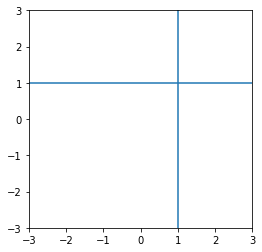

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize = ((4, 4))) #tworzymy obrazek i przypisany do niego wykres
ax.axvline(x = 1) #na wykresie rysujemy pionową kreskę dla x = 1
ax.axhline(y = 1) #na wykresie rysujemy poziomą kreskę dla y = 1
ax.set_xlim([-3, 3]) #ustalamy granice rysowania dla osi x
ax.set_ylim([-3, 3]) #ustalamy granice rysowania dla osi y
plt.show()

Jak widać, jest to bardzo proste, napiszmy więc funkcję `plotField(axis)`, która na podanej osi `axis` będzie rysować dwie pionowe i dwie poziome linie odpowiednio dla `x = -0.5, 0.5` oraz `y = -0.5, 0.5`. Ustalmy granice rysowania wykresu na `x = [-1.5, 1.5]` oraz `y = [-1.5, 1.5]`. Niech linie będą koloru czarnego. Na koniec skorzystamy też z odpowiedniej komendy pozwalającej ukryć osie.

In [9]:
def plotField(axis):
    axis.axvline(x = -0.5, color = 'black') #linia pionowa x = -0.5
    axis.axvline(x = 0.5, color = 'black') #linia pionowa x = 0.5
    axis.axhline(y = -0.5, color = 'black') #linia pozioma y = -0.5
    axis.axhline(y = 0.5, color = 'black') #linia pozioma y = 0.5
    axis.get_xaxis().set_visible(False) #usuwamy wyświetlanie osi x
    axis.get_yaxis().set_visible(False) #usuwamy wyśwetlanie osi y
    axis.set_xlim([-1.5, 1.5]) #ustawiamy granice rysowania na osi x na [-1.5, 1.5]
    axis.set_ylim([-1.5, 1.5]) #ustawiamy granice rysowania na osi y na [-1.5, 1.5]   

Sprawdźmy działanie

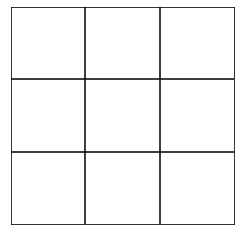

In [10]:
fig, ax = plt.subplots(1, figsize = ((4, 4)))
plotField(ax)
plt.show()

Jak widać wszystko działa idealnie. Zauważmy, że dzięki takim ustawieniom rysowania, środki kwadratów są w punktach (-1, -1) dla lewego dolnego, (-1, 0) dla lewego środkowego, i tak dalej. Ułatwi nam to pracę później.

Następnie potrzebujemy kółek i krzyżyków. Możemu skorzystać z argumentu `marker` w funkcji `plot`. Na przykład, chcemy narysować trzy punkty o podanych poniżej współrzędnych

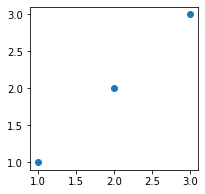

In [12]:
x = [1, 2, 3] #współrzedne x-owe
y = [1, 2, 3] #współrzędne y-owe
fig, ax = plt.subplots(1, figsize = ((3, 3))) #tworzymy wykres
ax.plot(x, y, 'o') #rysujemy punkty, argument 'o' oznacza, że mamy narysować punkty niepołączone ze sobą
plt.show()

Możemu w prosty sposób zmienić punkty z kropek na, na przykład, krzyżyki za pomocą dodatkowego argumentu `marker = 'x'`

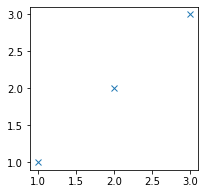

In [13]:
x = [1, 2, 3] #współrzedne x-owe
y = [1, 2, 3] #współrzędne y-owe
fig, ax = plt.subplots(1, figsize = ((3, 3))) #tworzymy wykres
#rysujemy punkty, argument 'o' oznacza, że mamy narysować punkty niepołączone ze sobą
ax.plot(x, y, 'o', marker = 'x') 
plt.show()

Możemy także zmienić rozmiary poprzez argument `markersize = ...`, ustalmy 20

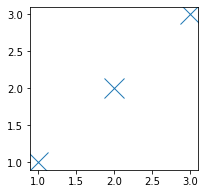

In [14]:
x = [1, 2, 3] #współrzedne x-owe
y = [1, 2, 3] #współrzędne y-owe
fig, ax = plt.subplots(1, figsize = ((3, 3))) #tworzymy wykres
#rysujemy punkty, argument 'o' oznacza, że mamy narysować punkty niepołączone ze sobą
ax.plot(x, y, 'o', marker = 'x', markersize = 20) 
plt.show()

Dla uzyskania kółek zamiast `'x'` wpiszemy `'o'`

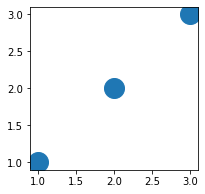

In [15]:
x = [1, 2, 3] #współrzedne x-owe
y = [1, 2, 3] #współrzędne y-owe
fig, ax = plt.subplots(1, figsize = ((3, 3))) #tworzymy wykres
#rysujemy punkty, argument 'o' oznacza, że mamy narysować punkty niepołączone ze sobą
ax.plot(x, y, 'o', marker = 'o', markersize = 20) 
plt.show()

A dla uzyskania pustych kółek dodatkowo mamy argument `fillstyle = 'none'`

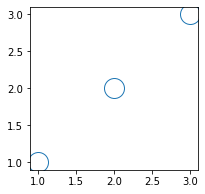

In [16]:
x = [1, 2, 3] #współrzedne x-owe
y = [1, 2, 3] #współrzędne y-owe
fig, ax = plt.subplots(1, figsize = ((3, 3))) #tworzymy wykres
#rysujemy punkty, argument 'o' oznacza, że mamy narysować punkty niepołączone ze sobą
ax.plot(x, y, 'o', marker = 'o', markersize = 20, fillstyle = 'none') 
plt.show()

Napiszmy więc funkcję `drawShape(axis, positions, shape)`, która na podanym wykresie `axis` będzie rysowała w podanych pozycjach `positions`, postaci listy punktów [(x1, y1), (x2, y2), ..., (xn, yn)], kółko albo krzyżyk w zależności od podanego argumentu `shape`. Dodatkowo, niech krzyżyki będą w kolorze niebieskim, a kółka w zielonym

In [17]:
def drawShape(axis, positions, shape):
    if shape == 'x': #jeśli krzyrzyki to niebieskie
        color = 'blue'
    else: #jesli co innego (czyli kółka) to zielone
        color = 'green'
    for a, b in positions: #iterujemy po wszystkich punktach z listy pozycji
        axis.plot(a, b, 'o', marker = shape, fillstyle = 'none', 
            markersize = 50, color = color) #rysujemy punkt po punkcie rozmiar 50

Sprawdźmy działanie od razu na naszej planszy do gry. W tym celu najpierw tworzymy obrazek i wykres, następnie wywołujemy rysowanie siatki, ustalamy punkty, w którch chcemy narysować krzyżyki i kółka i na koniec wywołujemy funkcję do rysowania kształtów.

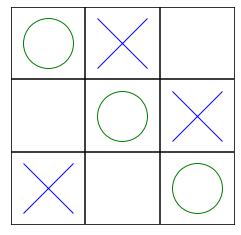

In [18]:
fig, ax = plt.subplots(1, figsize = ((4, 4)))
plotField(ax)
xPositions = [(-1, -1), (0, 1), (1, 0)] #krzyżyki lewy dolny, środkowy górny i prawy środkowy
oPositions = [(-1, 1), (0, 0), (1, -1)] #kółka lewy górny, środkowy środkowy i prawy dolny
drawShape(ax, xPositions, 'x')
drawShape(ax, oPositions, 'o')
plt.show()

Obie funkcje sprawują się bardzo dobrze, więc pora sprawić, żeby program był bardziej interaktywny. W tym celu stwórzmy funkcję `getPosition(text, oPositions, xPositions)`, która będzie prosiła użytkownika o podanie po przecinku współrzędnych do narysowania odpowiedniego znaku (`text` będzie zawierać tekst do wyświetlenia). Do tego funkcja będzie sprawdzała, czy podane współrzędne są prawidłowe oraz czy na wskazanym miejscu nie ma już innego znaku (porównując z punktami z list `oPositions` dla kółek oraz `xPositions` dla krzyżyków). Jeśli coś się nie będzie zgadzało, funkcja będzie czekać na podanie prawidłowych danych do skutku.

In [19]:
def getPosition(text, oPositions, xPositions):
    values = [-1, 0, 1] #prawidłowe wartości współrzędnych x i y
    while True: #wykonujemy tak długo jak to konieczne
        a, b = eval(input(text)) #prosimy użytkownika o podanie współrzędnych po przecinku
        if a in values and b in values: #sprawdzamy, czy współrzędne są prawidłowe
            if (a, b) in oPositions or (a, b) in xPositions: #sprawdzamy, czy współrzędne nie są już zajęte
                print('Pole jest już zajęte.') #jesli współrzędne są zajęte wyświetlamy tekst
            else:
                break #jeśli wszystko jest dobrze kończymy pętlę
        else:
            print('Nie ma takiego pola.') #jeśli współrzędne są nieprawidłowe wyświetlamy tekst
    return (a, b) #zwracamy punkt

Przetestujmy działanie. Niech listy z położeniami krzyżyków i kółek będą już częściowo wypełnione

In [20]:
oPositions = [(-1, -1), (0, 0)]
xPositions = [(-1, 1), (1, -1)]
text = 'Podaj współrzędne kółka: '
newPosition = getPosition(text, oPositions, xPositions)
print(newPosition)

Podaj współrzędne kółka: -1, -1
Pole jest już zajęte.
Podaj współrzędne kółka: 0, 0
Pole jest już zajęte.
Podaj współrzędne kółka: 2, 2
Nie ma takiego pola.
Podaj współrzędne kółka: 1, 1
(1, 1)


Funkcja działa prawidłowo. Zbierzmy więc cały kod razem i stwórzmy pętlę w której na przemian użytkownik będzie proszony o podanie położenia kółka i krzyżyka aż do wypełnienia całej planszy. Za każdym razem niech będzie takżę rysowana plansza z aktualną sytuacją.

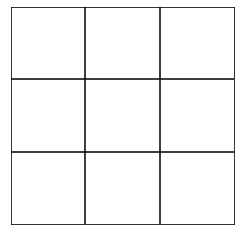

Podaj położenie kółka: -1, -1


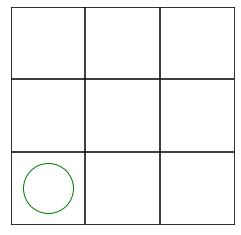

Podaj położenie krzyżyka: -1, 0


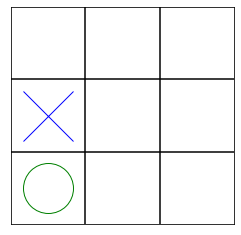

Podaj położenie kółka: -1, 1


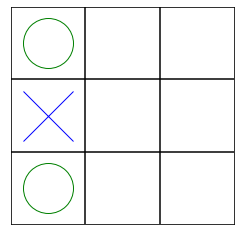

Podaj położenie krzyżyka: 0, -1


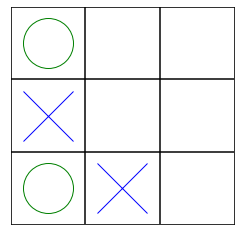

Podaj położenie kółka: 0, 0


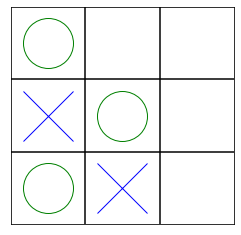

Podaj położenie krzyżyka: 0, 1


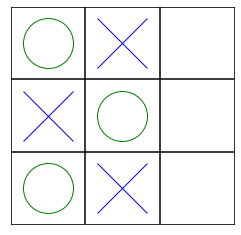

Podaj położenie kółka: 1, -1


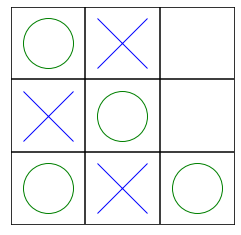

Podaj położenie krzyżyka: 1, 0


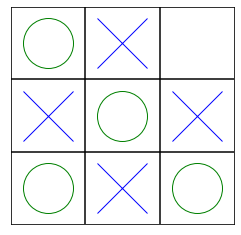

Podaj położenie kółka: 1, 1


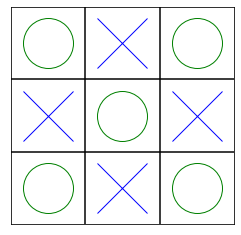

In [2]:
from matplotlib import pyplot as plt

def plotField(axis):
    axis.axvline(x = -0.5, color = 'black') 
    axis.axvline(x = 0.5, color = 'black')
    axis.axhline(y = -0.5, color = 'black') 
    axis.axhline(y = 0.5, color = 'black') 
    axis.get_xaxis().set_visible(False) 
    axis.get_yaxis().set_visible(False) 
    axis.set_xlim([-1.5, 1.5]) 
    axis.set_ylim([-1.5, 1.5]) 

def drawShape(axis, positions, shape):
    if shape == 'x':
        color = 'blue'
    else:
        color = 'green'
    for a, b in positions:
        axis.plot(a, b, 'o', marker = shape, fillstyle = 'none', 
            markersize = 50, color = color)   

def getPosition(text, oPositions, xPositions):
    values = [-1, 0, 1]
    while True:
        a, b = eval(input(text))
        if a in values and b in values:
            if (a, b) in oPositions or (a, b) in xPositions:
                print('Pole jest już zajęte.')
            else:
                break
        else:
            print('Nie ma takiego pola.')
    return (a, b)

fig, ax = plt.subplots(1, figsize = ((4, 4)))
plotField(ax)
plt.show()

textO = 'Podaj położenie kółka: '
textX = 'Podaj położenie krzyżyka: '
oPositions = []
xPositions = []
count = 0
while True:
    fig, ax = plt.subplots(1, figsize = ((4, 4)))
    plotField(ax)
    if count % 2 == 0: #dla parzystego przejścia pętli prosimy o kółka
        oPos = getPosition(textO, oPositions, xPositions) #nowy punkt
        oPositions.append(oPos) # dodajemy nowy punkt dla kółek
    else: #dla nieparzystego o krzyżyki
        xPos = getPosition(textX, oPositions, xPositions) #nowy punkt
        xPositions.append(xPos) # dodajemy nowy punkt dla krzyżyków
    drawShape(ax, oPositions, 'o') #rysujemy wszystkie kółka
    drawShape(ax, xPositions, 'x') #rysujemy wszystkie krzyżyki
    count += 1
    plt.show()
    if count == 9: #całą planszę wypełnimy po 9 przebiegach pętli
        break

Powyższy program działa dobrze, jednak jest mało wygodny, bo za każdym razem tworzymy nowy wykres, a uruchamiając go na komputerze poza Notebookiem musimy za każdym razem zamykać okienko. Możemy to obejść wykorzystując dwie rzeczy. Po pierwsze możemy skorzystać z metody `plt.ion()`, która ustala, że wykres jest interaktywny i można go na bieżąco aktualizować. Dodatkowo skorzystamy z `plt.show(block = False)` dzięki czemu działanie programu nie będzie blokowane przez otwarte okienko. 

In [ ]:
from matplotlib import pyplot as plt

def plotField(axis):
    axis.axvline(x = -0.5, color = 'black')
    axis.axvline(x = 0.5, color = 'black')
    axis.axhline(y = -0.5, color = 'black')
    axis.axhline(y = 0.5, color = 'black')
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    axis.set_xlim([-1.5, 1.5])
    axis.set_ylim([-1.5, 1.5])

def drawShape(axis, positions, shape):
    if shape == 'x':
        color = 'blue'
    else:
        color = 'green'
    for a, b in positions:
        axis.plot(a, b, 'o', marker = shape, fillstyle = 'none', 
            markersize = 50, color = color)   

def getPosition(text, oPositions, xPositions):
    values = [-1, 0, 1]
    while True:
        a, b = eval(input(text))
        if a in values and b in values:
            if (a, b) in oPositions or (a, b) in xPositions:
                print('Pole jest już zajęte.')
            else:
                break
        else:
            print('Nie ma takiego pola.')
    return (a, b)

fig, ax = plt.subplots(1, figsize = ((4, 4)))
plotField(ax)
plt.show(block = False) #zmiana na brak blokowania, można wykonywać dalsze instrukcje
plt.ion() #ustawiamy interaktywność, każda zmiana ax będzie wyświetlana

textO = 'Podaj położenie kółka: '
textX = 'Podaj położenie krzyżyka: '
oPositions = []
xPositions = []
count = 0
while True:
    if count % 2 == 0:
        oPos = getPosition(textO, oPositions, xPositions)
        oPositions.append(oPos)
        drawShape(ax, [oPos], 'o') #rysujemy tylko nowe kółko
    else:
        xPos = getPosition(textX, oPositions, xPositions)
        xPositions.append(xPos)
        drawShape(ax, [xPos], 'x') #rysujemy tylko nowy krzyżyk
    count += 1
    if count == 9:
        break

#zatrzymujemy program po zakończeniu działania inaczej okienko mignie i zniknie
print('Naciśnij Enter aby zakończyć') 
input()

Niestety ten program nie będzie działał w Notebooku, ponieważ interakywność nie jest obsługiwana, zachęcam więc do przekopiowania kodu na swój komputer i uruchomienia lokalnie.

**Zadanie domowe!**

Jak widać programowi brakuje jednej, bardzo istotnej funkcjonalności - określania kto wygrał. Zadaniem domowym jest napisanie dwóch funkcji. Pierwsza `isWin(positions)` pobieraja jako argument `positions` listę pozycji kółek bądź krzyżyków i zwraca wartość `True` jeśli pozycje sugerują zwycięsto, albo `False` w przeciwnym razie. Druga faunkcja `isDraw(count)` zwraca wartość `False` jeśli nie ma remisu i wartość `True` jesli jest. Argumentem jest liczba przebiegów pętli `count` (dlaczego to wystarczy?).  

W celu uproszczenia zadania, polecam skorzystać z poniższego szkieletu, gdzie zamiast ostatnich dwóch linijek w pętli mamy trzy instrukcje warunkowe

In [ ]:
from matplotlib import pyplot as plt

def plotField(axis):
    axis.axvline(x = -0.5, color = 'black')
    axis.axvline(x = 0.5, color = 'black')
    axis.axhline(y = -0.5, color = 'black')
    axis.axhline(y = 0.5, color = 'black')
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    axis.set_xlim([-1.5, 1.5])
    axis.set_ylim([-1.5, 1.5])

def drawShape(axis, positions, shape):
    if shape == 'x':
        color = 'blue'
    else:
        color = 'green'
    for a, b in positions:
        axis.plot(a, b, 'o', marker = shape, fillstyle = 'none', 
            markersize = 50, color = color)   

def getPosition(text, oPositions, xPositions):
    values = [-1, 0, 1]
    while True:
        a, b = eval(input(text))
        if a in values and b in values:
            if (a, b) in oPositions or (a, b) in xPositions:
                print('Pole jest już zajęte.')
            else:
                break
        else:
            print('Nie ma takiego pola.')
    return (a, b)

def isWin(positions):
    '''TO DO'''
    
def isDraw(count):
    '''TO DO'''
    
fig, ax = plt.subplots(1, figsize = ((4, 4)))
plotField(ax)
plt.show(block = False)
plt.ion()

textO = 'Podaj położenie kółka: '
textX = 'Podaj położenie krzyżyka: '
oPositions = []
xPositions = []
count = 0
while True:
    if count % 2 == 0:
        oPos = getPosition(textO, oPositions, xPositions)
        oPositions.append(oPos)
        drawShape(ax, [oPos], 'o')
    else:
        xPos = getPosition(textX, oPositions, xPositions)
        xPositions.append(xPos)
        drawShape(ax, [xPos], 'x')
    count += 1
    if count > 4: #wygrać można najszybciej w piątym ruchu
        if isWin(oPositions): #sprawdzamy czy wygrały kółka
            print('Wygrały kółka!')
            break
        if isWin(xPositions): #sprawdzamy czy wygrały krzyżyki
            print('Wygrały krzyżyki!')
            break
        if isDraw(count): #sprawdzamy czy jest remis
            print('Remis!')
            break

print('Naciśnij Enter aby zakończyć') 
input()

**Zadanie dodatkowe**

Granie samemu jest nudne, więc jako dodatek proponuję dopisanie do funkcji `getPosition` nowego argumentu `random = False`. Jak widać, argument domyślnie jest ustawiony na `False` i wtedy funkcja działa jak do tej pory, ale po zmianie na `True` ma zwracać losowy punkt, który spełnia wszystkie warunki (zamiast prosić o nie użytkownika). Następnie w kodzie można ustalić, że np. krzyżyki są generowane losowo i grać przeciwko takiemu losowemu przeciwnikowi.

Powodzenia!